In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from apifunctions import *

import matplotlib.pyplot as plt
from scipy import stats
import streamlit as st

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
wacc=pd.read_csv("../data/wacc.csv",index_col = 'ID')
prices=pd.read_csv("../data/prices.csv")
sales_growth=pd.read_csv("../data/sales_growth.csv", index_col = 'ID')
parameters_new_t=pd.read_csv("../data/parameters_new_t.csv")
companies_to_use=pd.read_csv("../data/companies_to_use.csv")
market_cap=pd.read_csv("../data/market_cap.csv",index_col = 'ID')
shares_outstanding=pd.read_csv("../data/shares_outstanding.csv",index_col = 'ID')

In [4]:
companies_to_use=companies_to_use['0'].values.tolist()

#### First we select the year and the list of companies for which we want to calculate the dcf_value and distributions

In [5]:
year="2021"
companies_to_use=companies_to_use

#### We first get the last year revenue of the companies we are interested in:


In [6]:
sales_last_year=last_year_rev(companies_to_use,parameters_new_t,year)

#### We rename the columns in the sales_growth dataset for simplicity

In [7]:
sales_growth.columns = ['2010', '2011', '2012', '2013','2014', '2015', '2016', '2017','2018', '2019', '2020', '2021']

#### We put into a list the growth rate we are going to use for the selected companies

In [8]:
growth_rate=growth_rate(companies_to_use,sales_growth,year)

#### We get the parameters we are going to use for the free cash flow calculations


In [9]:
ebitda_margin,depr_percent,nwc_percent,capex_percent,tax_rate=parameters(companies_to_use,parameters_new_t,year)

#### We calculate the free cash flows for the list of companies we have

In [11]:
free_cash_flows=[]
for i in range(len(ebitda_margin)):
    
    free_cash_flows.append(free_cash_flow(growth_rate[i],ebitda_margin[i],depr_percent[i],nwc_percent[i],capex_percent[i],tax_rate[i],sales_last_year[i],year))

#### we set the cash flows as dataframes so that we can plot them separately afterwards

In [15]:
data=pd.DataFrame(free_cash_flows[1])
data.rename(columns={0: "Free Cash Flow"}, inplace=True)



#### We calculate the dcf_value for each of the companies:

In [16]:
wacc.columns = ['2010', '2011', '2012', '2013','2014', '2015', '2016', '2017','2018', '2019', '2020', '2021']

#### We calculate the terminal value for each of the companies

In [17]:
dcf_values=[]
for i in range(len(ebitda_margin)):
    
    dcf_values.append(terminal_value(wacc["2021"][i],free_cash_flows[i],growth_rate[i]))

#### We iterate 10,000 times the values of sales_growth, ebitda_margin and nwc_percent  using a monte_carlo simulation to get the distribution of the price for each company

In [18]:
output_distribution=[]

for j in range(len(companies_to_use)):

    
    growth_rate_f=growth_rate[j]
    ebitda_margin_f=ebitda_margin[j]
    depr_percent_f=depr_percent[j]
    nwc_percent_f=nwc_percent[j]
    capex_percent_f=capex_percent[j]
    tax_rate_f=tax_rate[j]
    sales_last_year_f=sales_last_year[j]
    wacc_f=wacc[year][companies_to_use[j]]
    free_cash_flows_f=free_cash_flows[j]

    output_distribution.append(run_mcs(growth_rate_f,ebitda_margin_f,depr_percent_f,nwc_percent_f,capex_percent_f,tax_rate_f,sales_last_year_f,wacc_f,free_cash_flows_f))
    

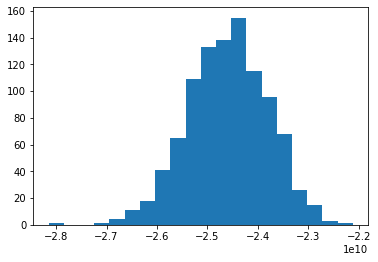

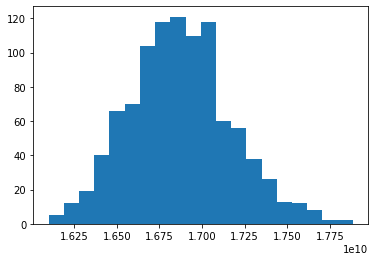

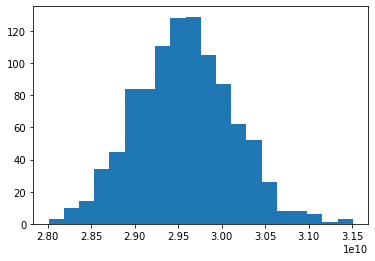

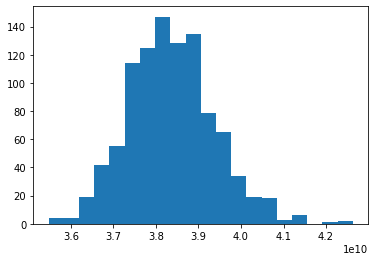

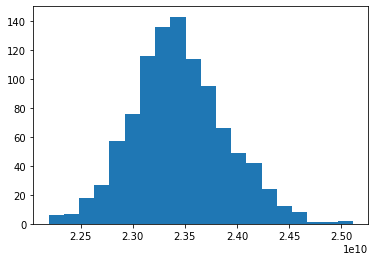

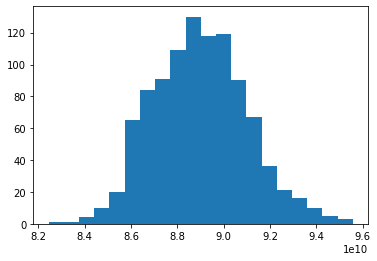

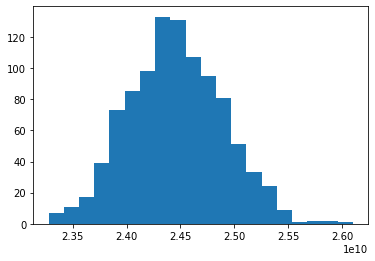

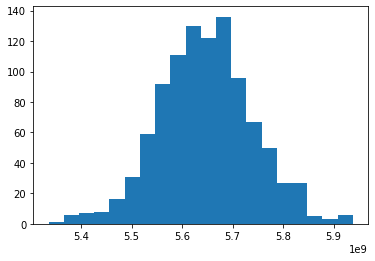

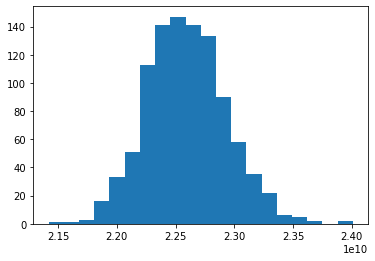

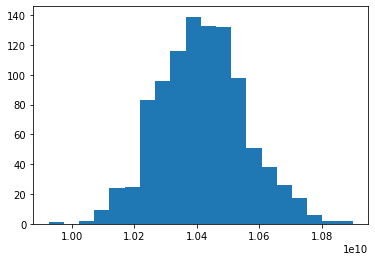

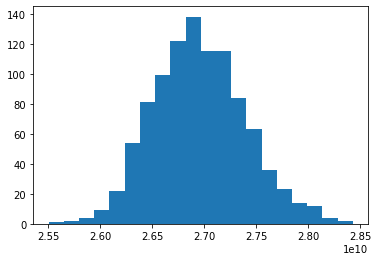

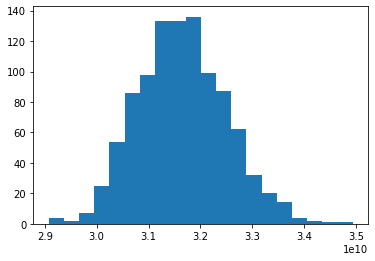

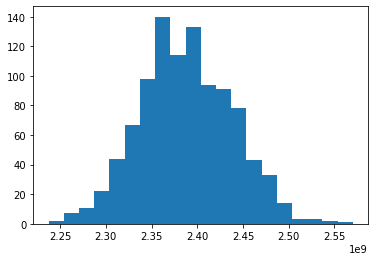

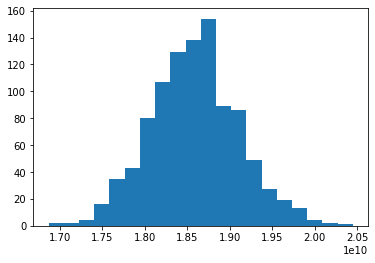

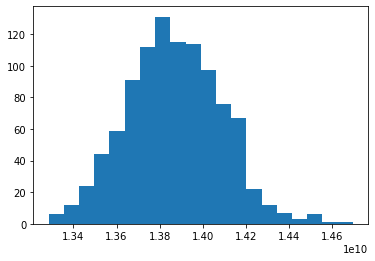

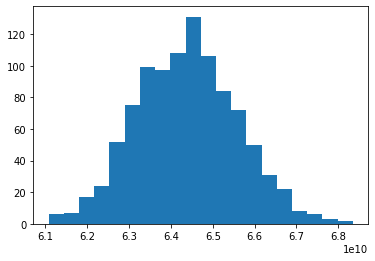

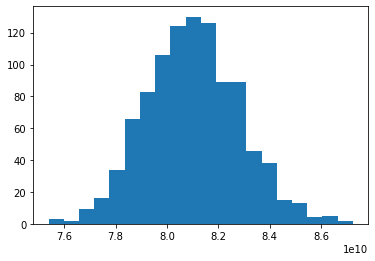

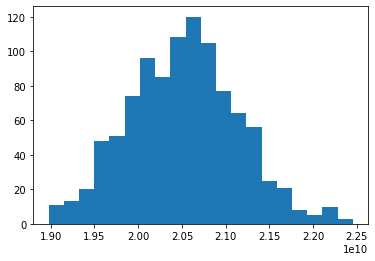

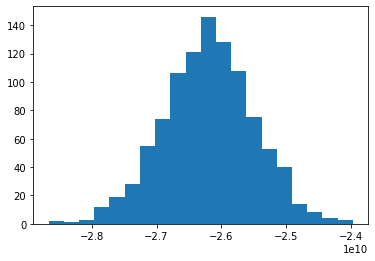

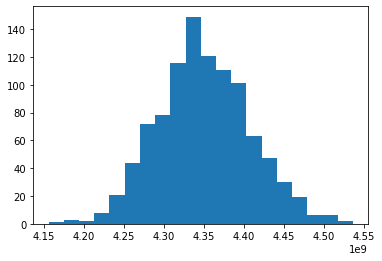

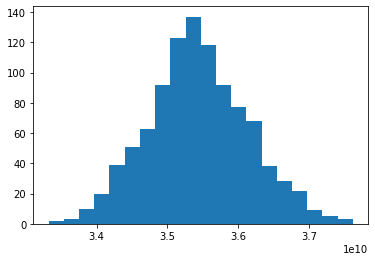

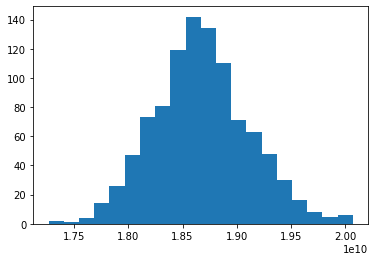

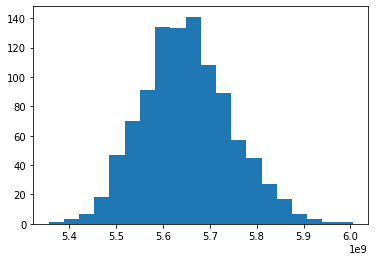

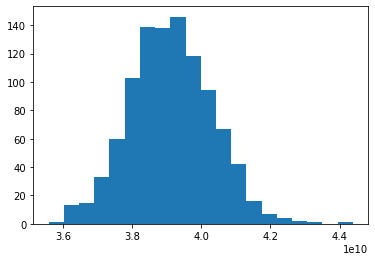

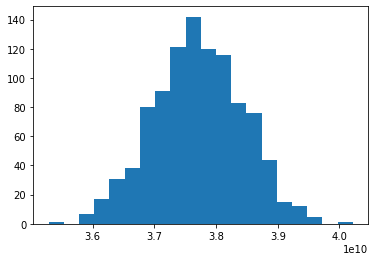

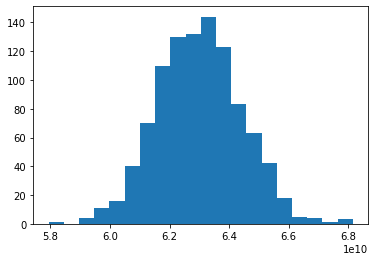

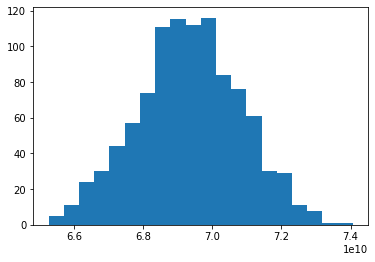

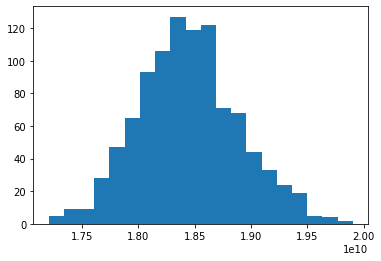

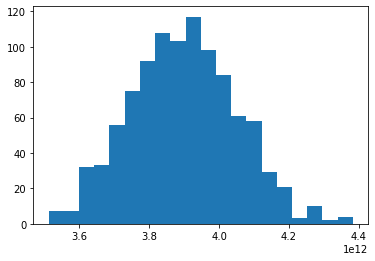

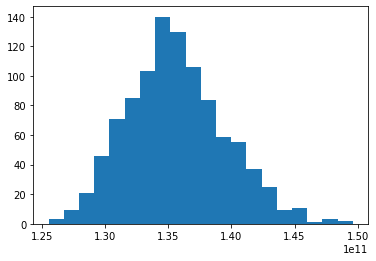

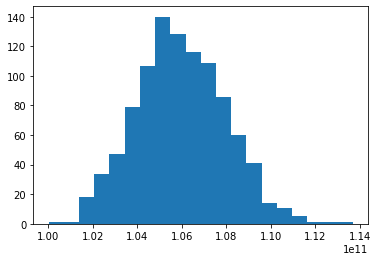

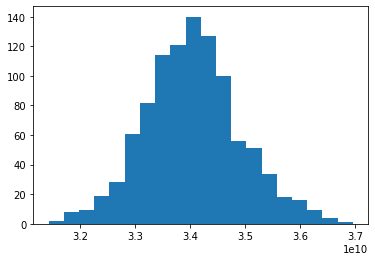

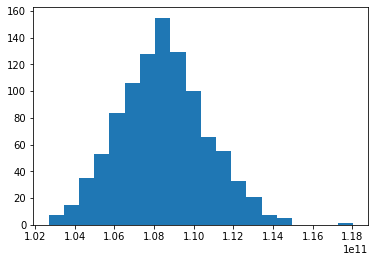

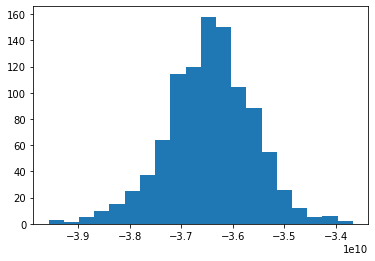

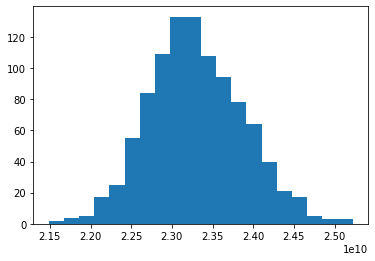

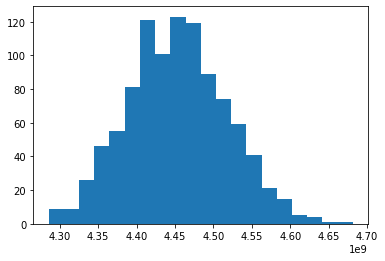

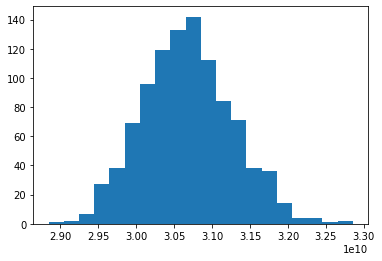

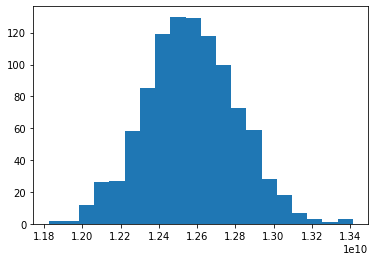

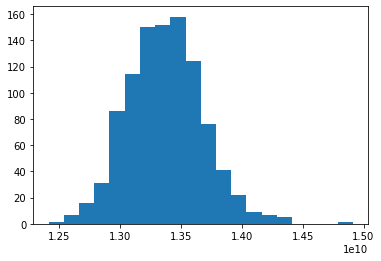

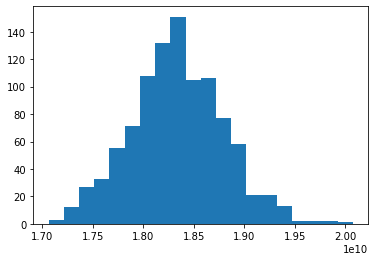

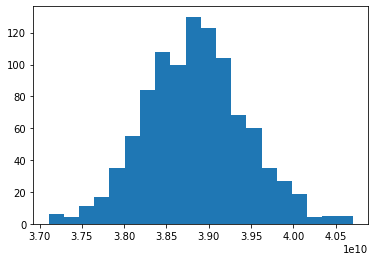

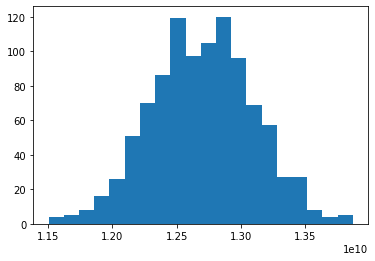

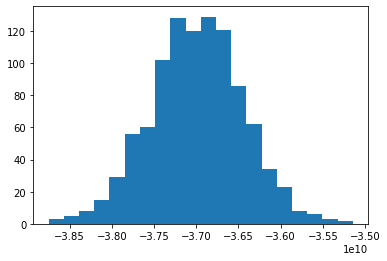

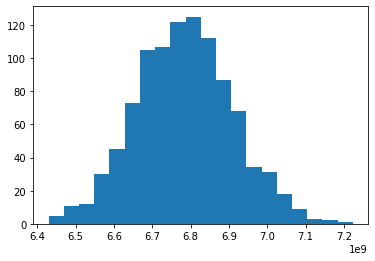

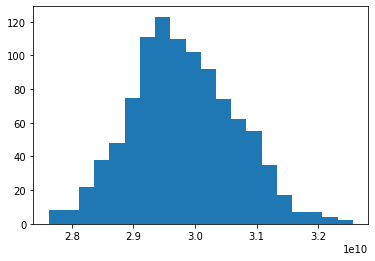

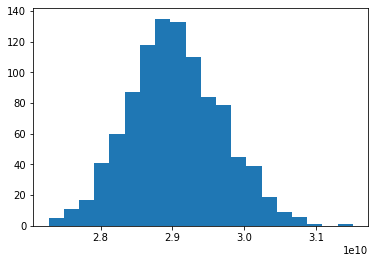

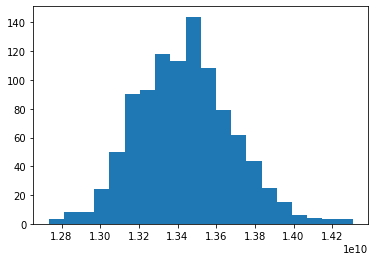

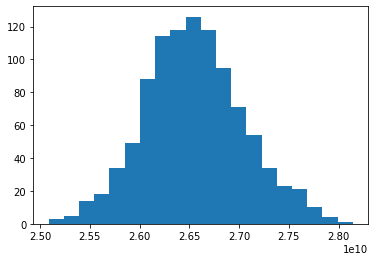

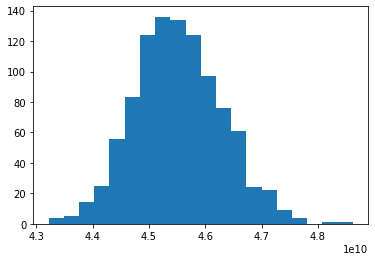

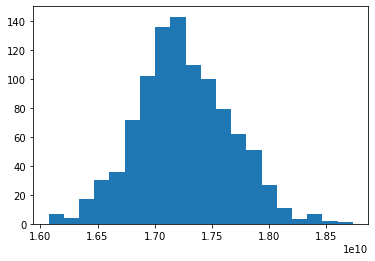

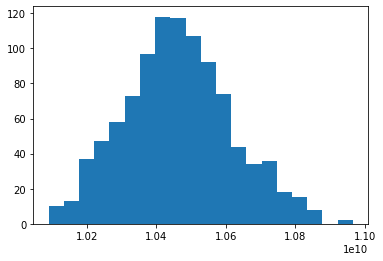

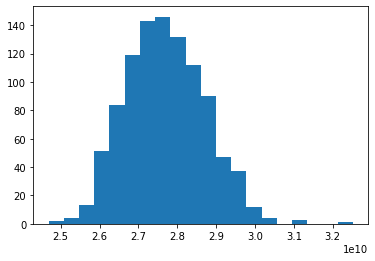

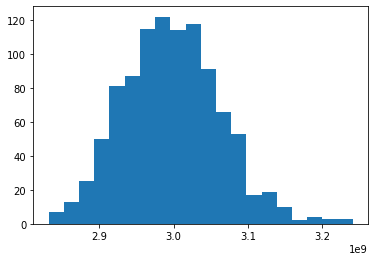

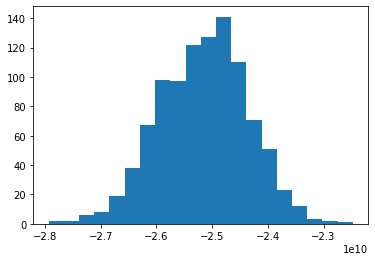

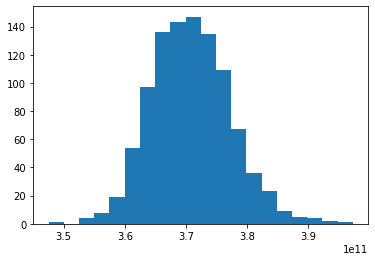

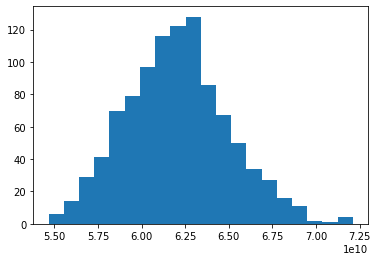

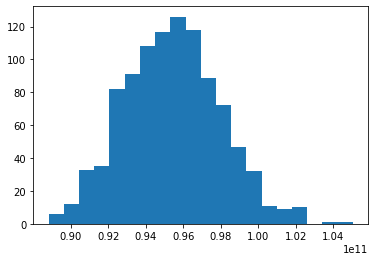

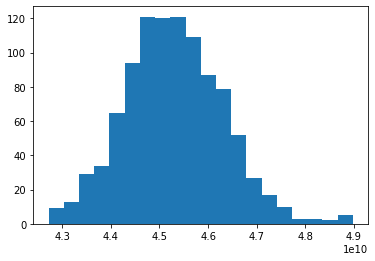

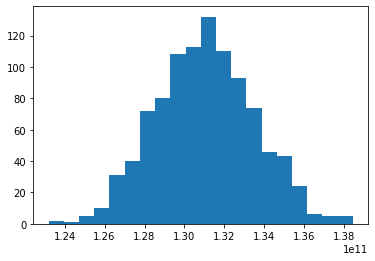

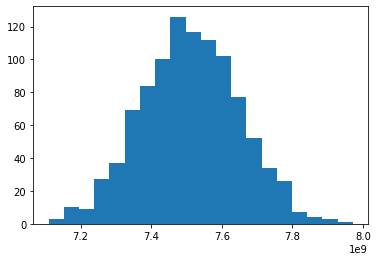

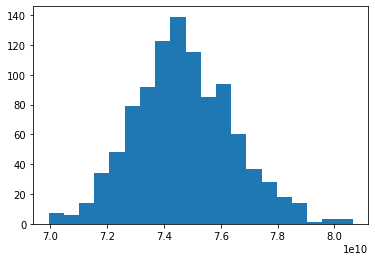

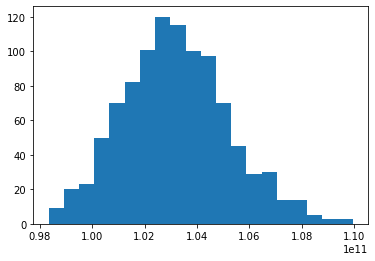

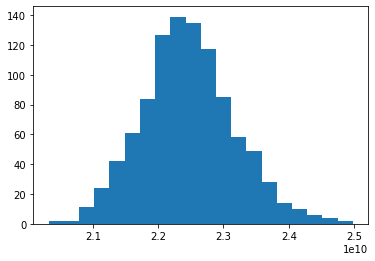

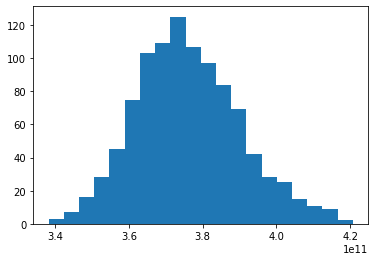

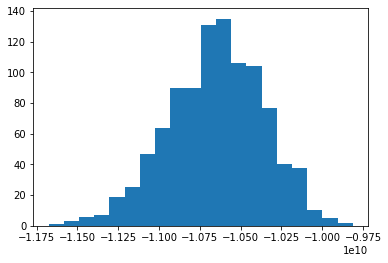

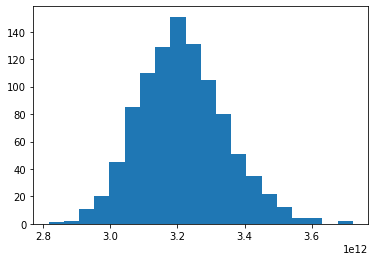

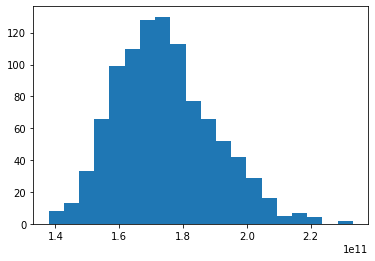

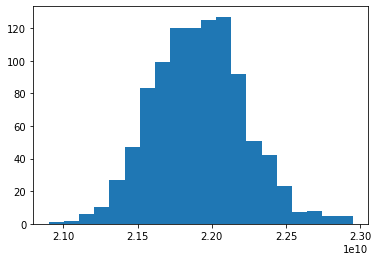

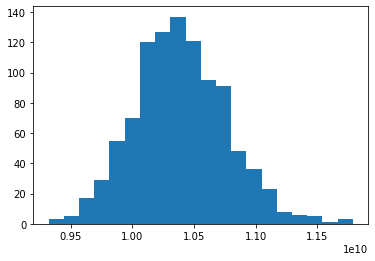

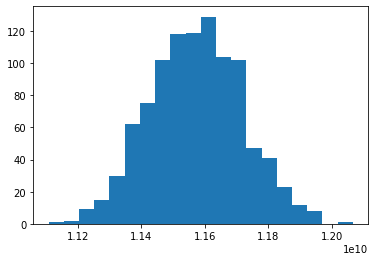

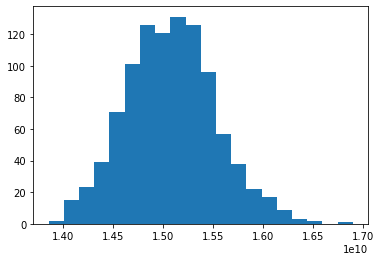

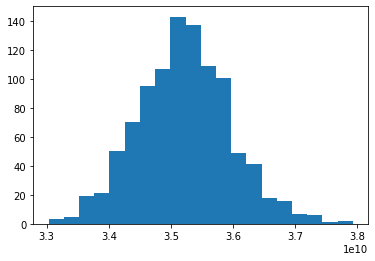

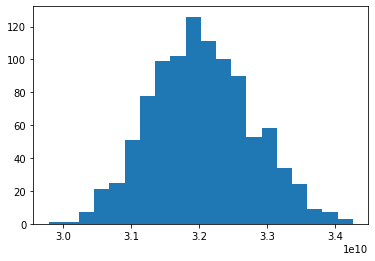

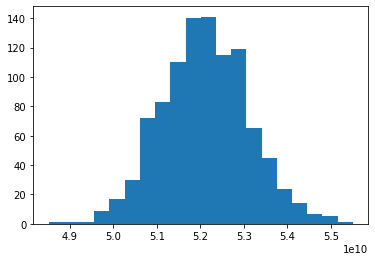

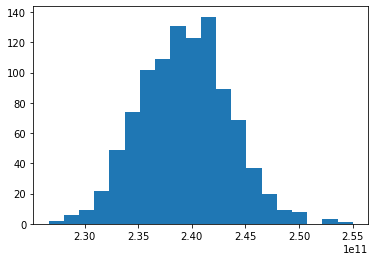

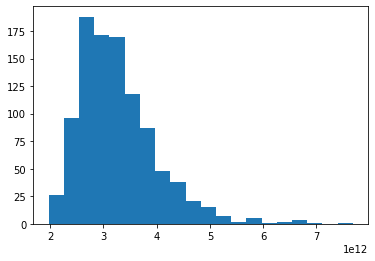

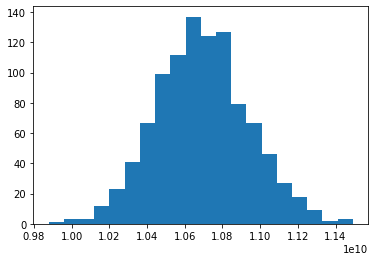

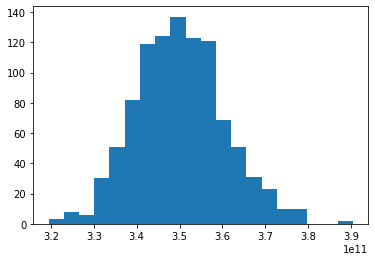

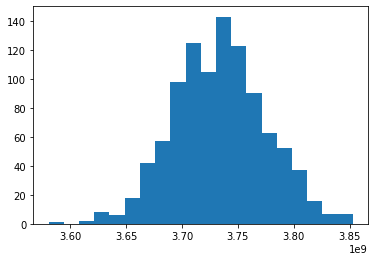

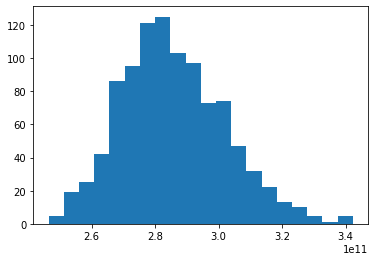

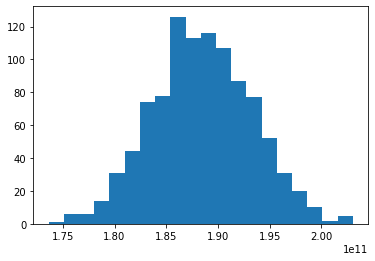

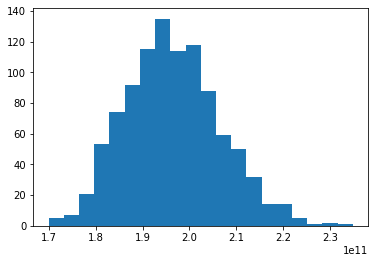

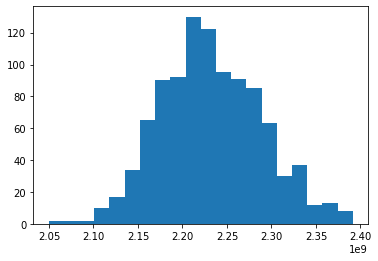

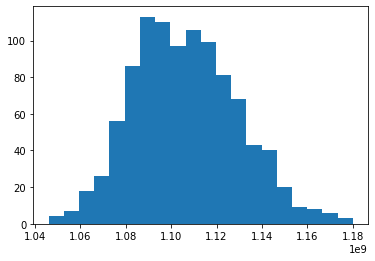

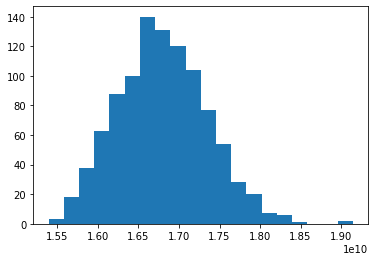

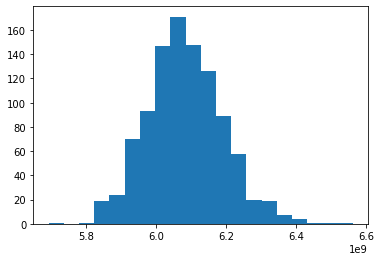

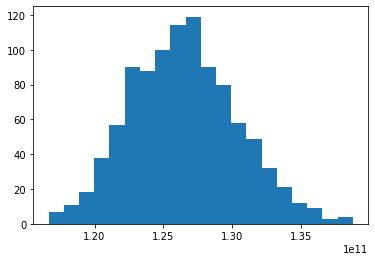

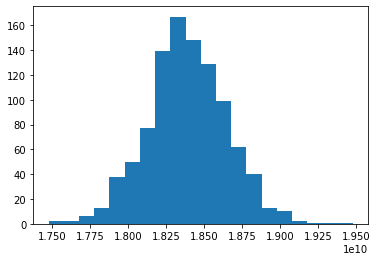

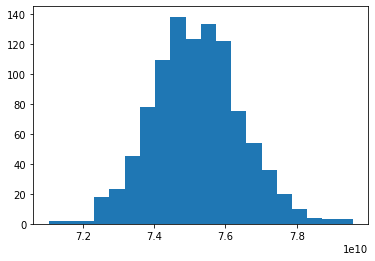

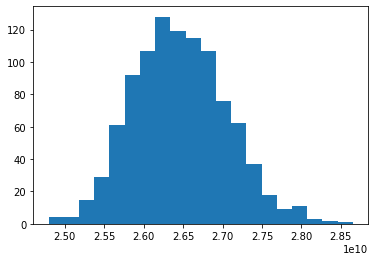

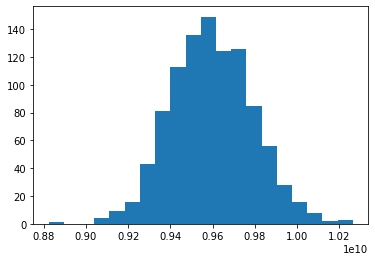

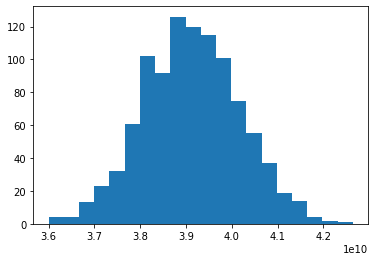

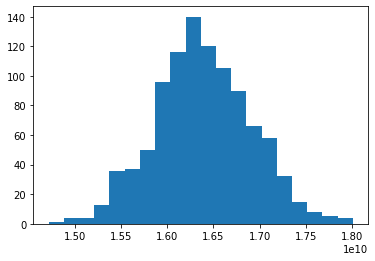

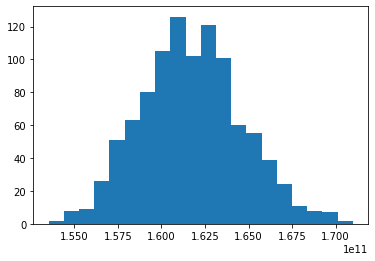

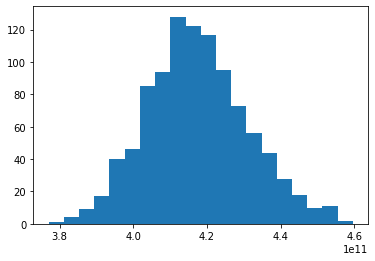

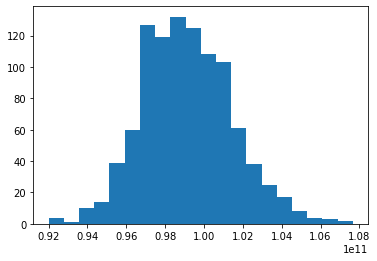

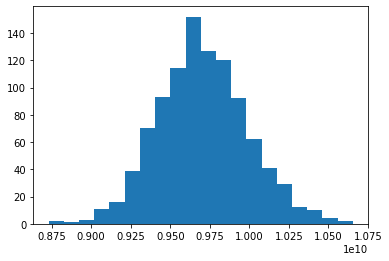

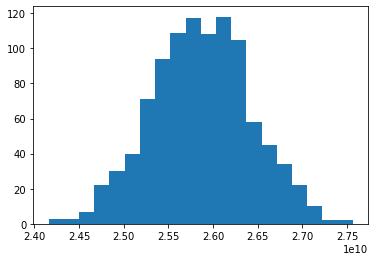

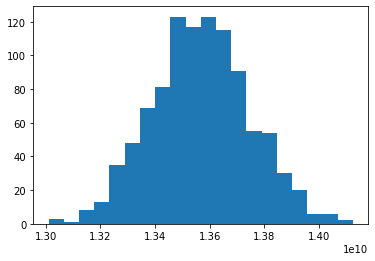

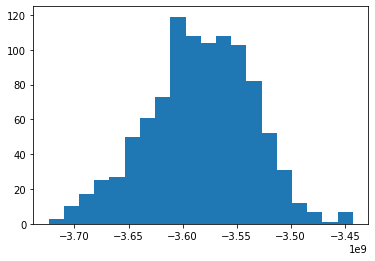

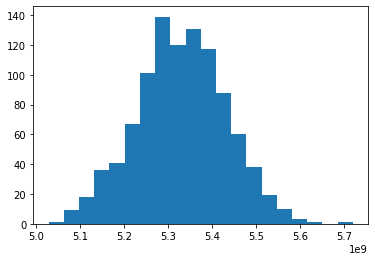

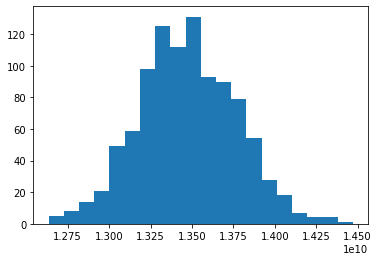

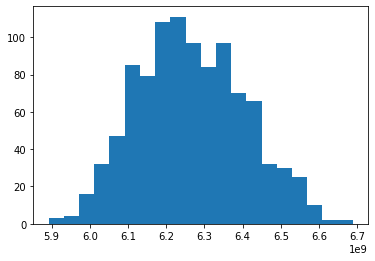

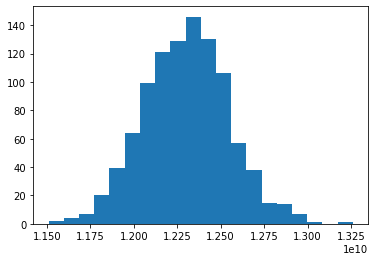

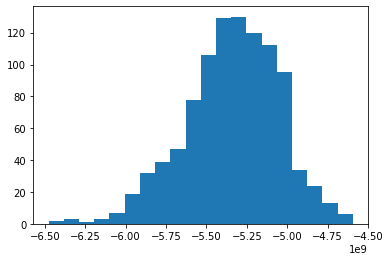

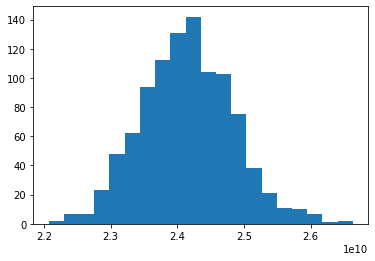

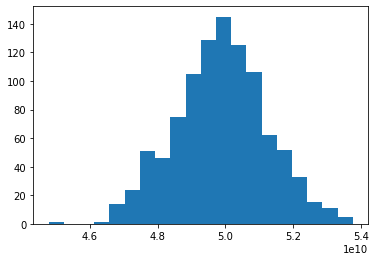

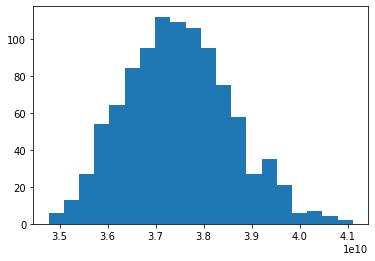

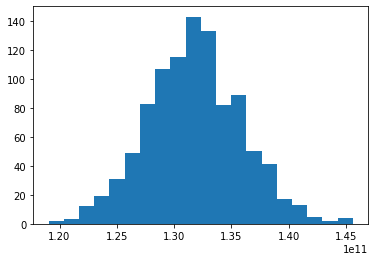

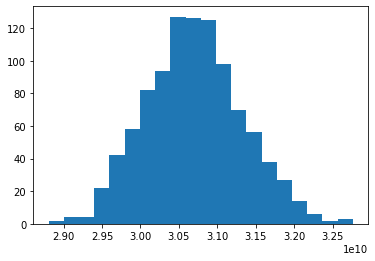

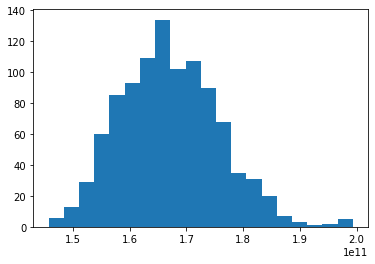

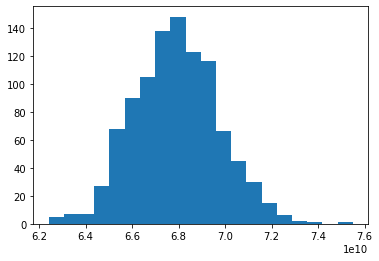

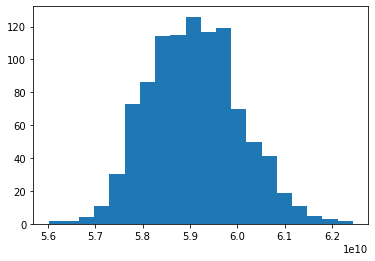

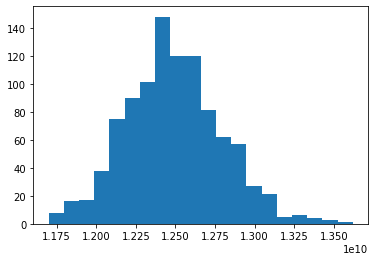

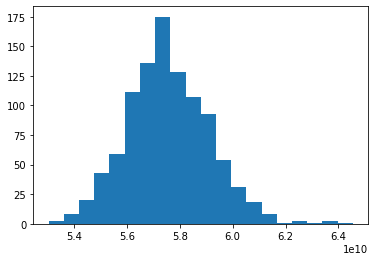

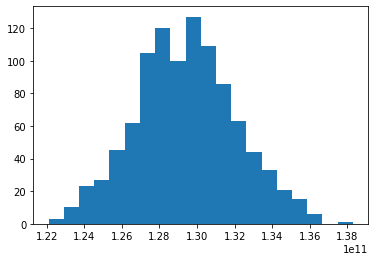

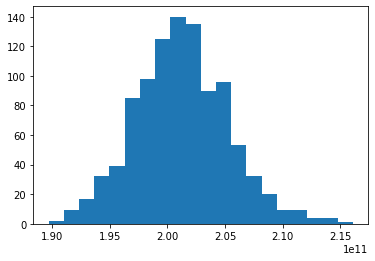

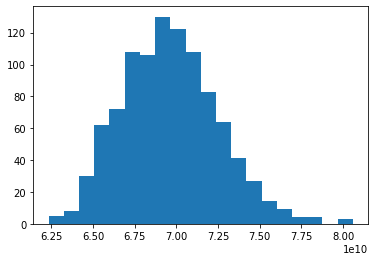

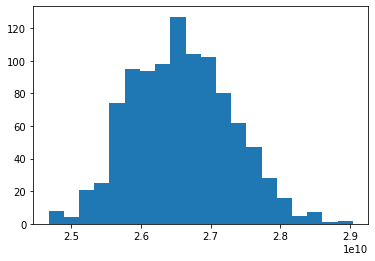

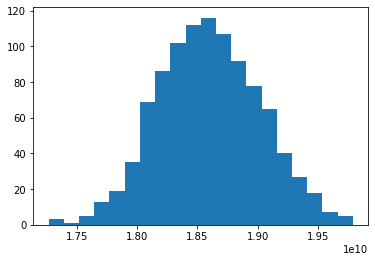

In [19]:
mode=[]

for i in output_distribution:
    
    mode.append(max(set(i), key=i.count))
    plt.hist(i, bins = 20)
    plt.show()